# Trade Route Proportion Chart
### Code reads in a formatted Excel file, and creates a stacked bar chart for each continent of the proportions of each IWT trade route segment (supply, transit, and demand).

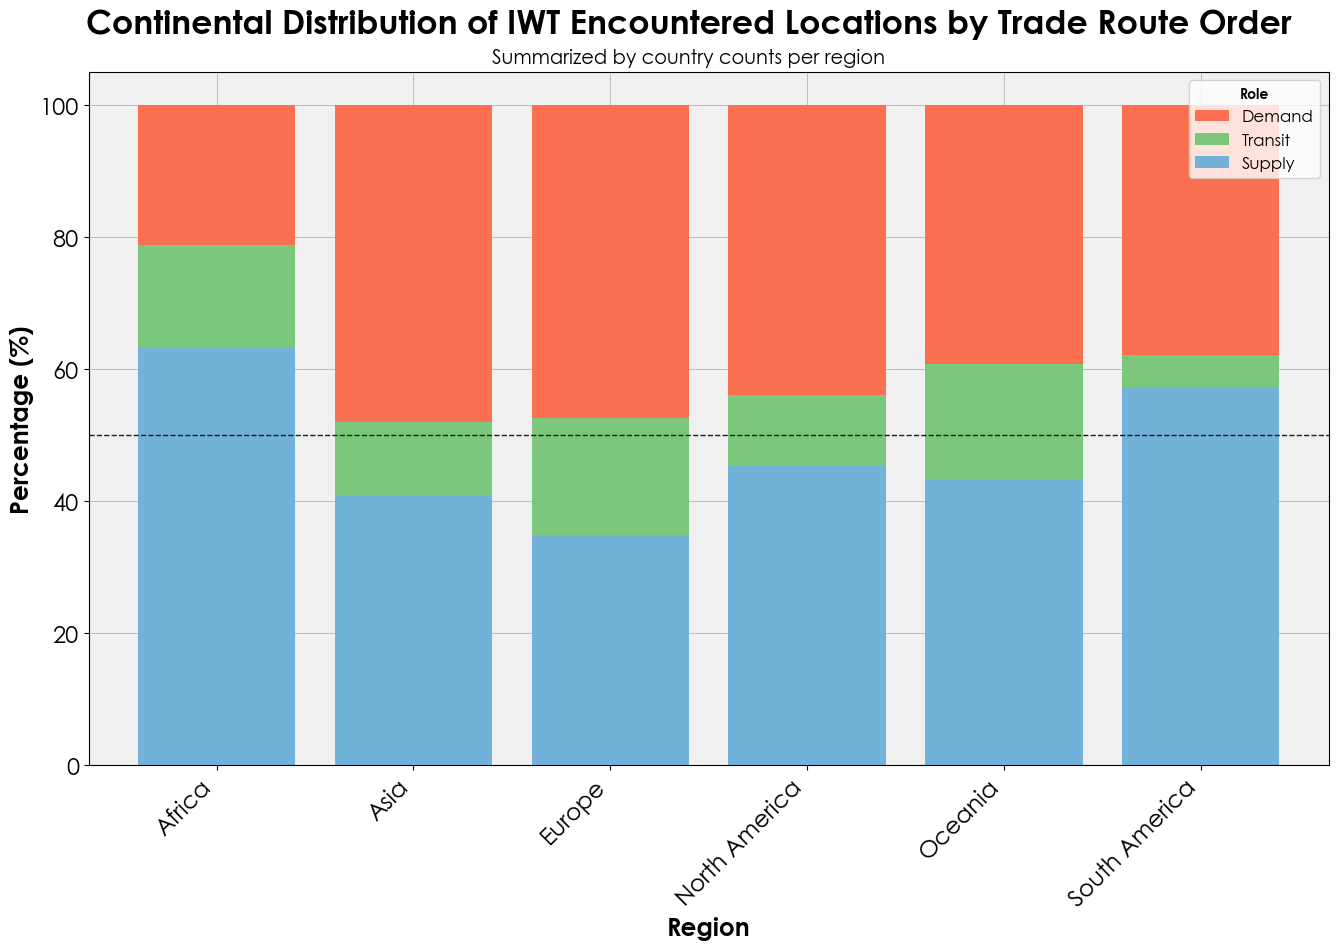

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

# Set global font
rcParams["font.family"] = "Century Gothic"

# Load excel data (same data from QGIS choropleth visualizations)
data = pd.read_excel("Data/proportions.xlsx")

# Group data by "Region", then count occurrances for each trade route segment
grouped_data = data.groupby(["Region"])[["Supply", "Transit", "Demand"]].sum()

# Convert counts into percentages
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(16, 9))

# Manually set the bar chart order
custom_order = ["Supply", "Transit", "Demand"]

# Set colours for each trade route component (to match with choropleth maps)
role_colours = {
    "Supply": "#73b2d8",
    "Transit": "#7bc77c",
    "Demand": "#fb7050"
}

# Plot the data as a stacked bar chart
grouped_data_percentage[custom_order].plot(kind="bar", stacked=True, ax=ax, color=[role_colours[role] for role in custom_order], width=0.8, zorder=2)

# Change figure component colours
fig.patch.set_facecolor("white") 
ax.set_facecolor("#f0f0f0")

# Add title
fig.suptitle("Continental Distribution of IWT Encountered Locations by Trade Route Order", fontsize=24, fontweight="bold", y=0.95, ha="center")

# Add subtitle
plt.figtext(0.5, 0.89, "Summarized by country counts per region", fontsize=14, fontweight="light", ha="center")

# Adjust spacing
fig.subplots_adjust(top=0.88)

# Add X and Y axis labels
ax.set_xlabel("Region", fontsize=18, fontweight="bold")
ax.set_ylabel("Percentage (%)", fontsize=18, fontweight="bold")

# Modify X axis tick labels
ax.set_xticklabels(grouped_data_percentage.index, rotation=45, ha="right", fontsize=17)
ax.tick_params(axis="y", labelsize=17)

# Create manual legend to follow the same order as the bar chart
handles = [plt.Rectangle((0, 0), 1, 1, color=role_colours[role]) for role in custom_order]
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title="Role", title_fontproperties=FontProperties(weight="bold"), loc="upper right", fontsize=12)

# Add grid lines
ax.grid(True, color="darkgrey", linestyle="-", linewidth=0.5, zorder=0)

# Add 50% horizontal line
ax.axhline(y=50, color="#1a1b1c", linestyle="--", linewidth=1, zorder=2)

# Export plot
plt.savefig("Output/stacked_bar_chart_roles_by_region.png", dpi=600, bbox_inches="tight")

# plt.show()